In [1]:
import pandas
import networkx
import matplotlib.pyplot as plt

In [2]:
d = pandas.read_csv('./tweets.csv') # read in csv store as object d
d.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


In [3]:
trump = d.loc[(d['handle']=='realDonaldTrump') & (d['is_retweet']==True)]
trump.head()

,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
11,780867418012979204,realDonaldTrump,"On National #VoterRegistrationDay, make sure y...",True,GOP,2016-09-27T20:31:14,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,"{'user_mentions': [{'id_str': '11134252', 'nam...",NaN
89,780596317865254913,realDonaldTrump,.@realDonaldTrump calling out @HillaryClinton'...,True,TeamTrump,2016-09-27T02:33:59,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'user_mentions': [{'id_str': '729676086632656...,NaN
97,780593350604824576,realDonaldTrump,100% TRUE --&gt; @realDonaldTrump is right - @...,True,TeamTrump,2016-09-27T02:22:12,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,{'user_mentions': [{'id_str': '729676086632656...,NaN
100,780592630585499648,realDonaldTrump,Hillary's policies have made America less safe...,True,TeamTrump,2016-09-27T02:19:20,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'user_mentions': [{'id_str': '729676086632656...,NaN
105,780590406501150723,realDonaldTrump,Jesse Jackson on @realDonaldTrump - when he do...,True,DanScavino,2016-09-27T02:10:30,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,"{'user_mentions': [{'id_str': '620571475', 'na...",NaN


In [38]:
trumpre = trump.groupby(['original_author']).agg({'text':'count'})
trumpre.rename(columns={'text':'num_retweets'},inplace=True) ## rename column we created
trumpre['retweet_author'] = "realDonaldTrump" ## add column to list that trump was retweeting
trumpre['original_author'] = trumpre.index
trumpre1=trumpre[trumpre["num_retweets"]>1]
print trumpre1

                 num_retweets   retweet_author original_author
original_author                                               
AnnCoulter                  5  realDonaldTrump      AnnCoulter
CLewandowski_               3  realDonaldTrump   CLewandowski_
Carl_C_Icahn                2  realDonaldTrump    Carl_C_Icahn
DRUDGE_REPORT               9  realDonaldTrump   DRUDGE_REPORT
DanScavino                  8  realDonaldTrump      DanScavino
DonaldJTrumpJr              8  realDonaldTrump  DonaldJTrumpJr
EricTrump                  17  realDonaldTrump       EricTrump
GOP                         2  realDonaldTrump             GOP
IvankaTrump                 4  realDonaldTrump     IvankaTrump
JoeNBC                      4  realDonaldTrump          JoeNBC
KellyannePolls              2  realDonaldTrump  KellyannePolls
LouDobbs                    2  realDonaldTrump        LouDobbs
NRA                         2  realDonaldTrump             NRA
RSBNetwork                  3  realDonaldTrump      RSB

In [54]:
G = networkx.from_pandas_dataframe(trumpre1,'retweet_author','original_author',['num_retweets'])

# get dimensions of graph
print("Number of Nodes")
print(G.number_of_nodes())

# look at nodes and edges
print("\n\nNodes")
for n in G.nodes():
    print(n)
    

print("\nEdges")
for e in G.edges(data=True):
    print(e[2]["num_retweets"])

Number of Nodes
22


Nodes
DonaldJTrumpJr
realDonaldTrump
seanhannity
EricTrump
DanScavino
RealBenCarson
LouDobbs
gatewaypundit
mike_pence
TeamTrump
AnnCoulter
greta
DRUDGE_REPORT
JoeNBC
GOP
KellyannePolls
NRA
RSBNetwork
foxandfriends
IvankaTrump
CLewandowski_
Carl_C_Icahn
<type 'list'>

Edges
8
6
2
2
5
2
2
2
4
2
9
2
3
17
4
8
3
3
3
2
2


In [6]:
import warnings

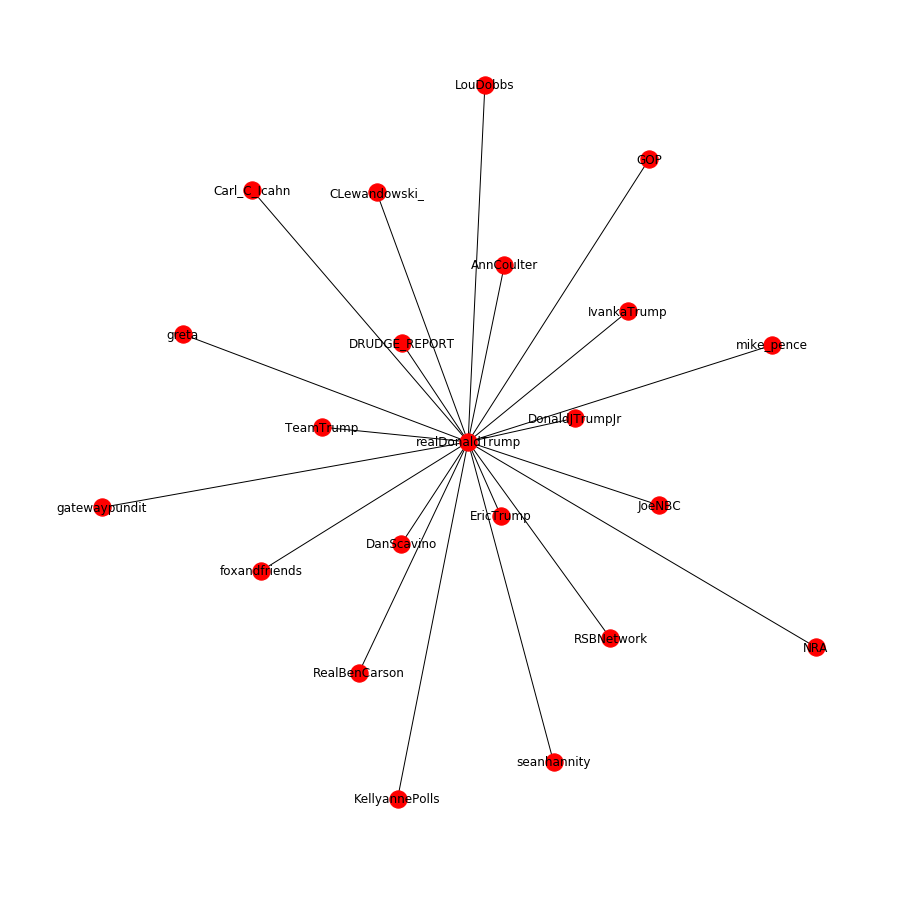

In [85]:
import warnings

warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="networkx")

# plot graph basic graph
pos = networkx.spring_layout(G,weight="num_retweets",scale=50) # set position for nodes, use the number of tweets to specify distance between nodes
plt.figure(1,figsize=(12,12)) # set the dimensions of the figure, to make sure nodes are not too squished together 
networkx.draw(G,pos=pos,with_labels=True,node_size=300,font_size=12) # draw the graph, input the positions you calculated, include labels, set node size and font size
plt.savefig("Trump_retweet_network.png") # save as png
plt.show() # display

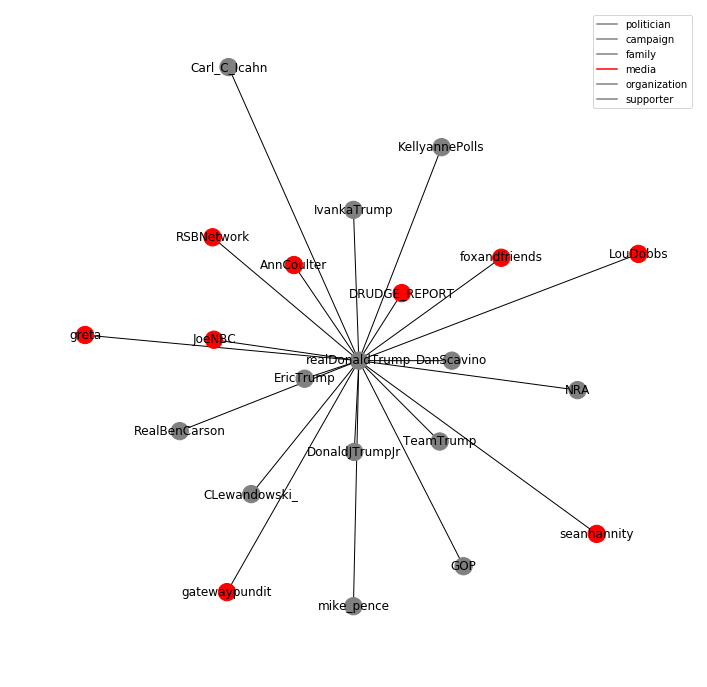

In [84]:
# Draw your network with information about nodes
## read in data frame with node attribute information
n = pandas.read_csv('./trumpnodeinfo.csv') # read in csv store as object d
n.head()

## add node attribute information to graph
for index,row in n.iterrows():
    if row['node'] in G.nodes():
        nodename = row['node']
        nodetype = row['nodetype']
        G.node[nodename]['nodetype'] = nodetype

    
    
## redo drawing, coloring node by attribute
### create a color map
val_to_color = {'campaign':'gray',
                'supporter':'gray',
                'family':'gray',
                'organization':'gray',
                'media':'red',
                'politician':'gray'
}

# loop over nodes, select nodetype for each node (you have to ask it to give you node attributes by using data=True, the attributes are stored as a dictionary in node[1])
# map these nodetype to a number which we will use to assign it a number
node_colors = [val_to_color.get(node[1]['nodetype'], 'magenta') for node in G.nodes(data=True)]

## draw network
### decide on position and create figure
pos = networkx.spring_layout(G,weight="num_retweets",scale=50) 
f = plt.figure(1,figsize=(12,12))


### create legend
ax = f.add_subplot(1,1,1)
for label in val_to_color:
    ax.plot([0],[0],color=val_to_color[label],label=label)

### draw network
networkx.draw(G,pos=pos, with_labels=True,node_size=300,font_size=12,node_color=node_colors) # draw the graph, input the positions you calculated, include labels, set node size and font size

### draw legend
f.set_facecolor('w')
plt.legend()

### save drawing
plt.savefig("Trump_media_network.png") # save as png
plt.show() # display

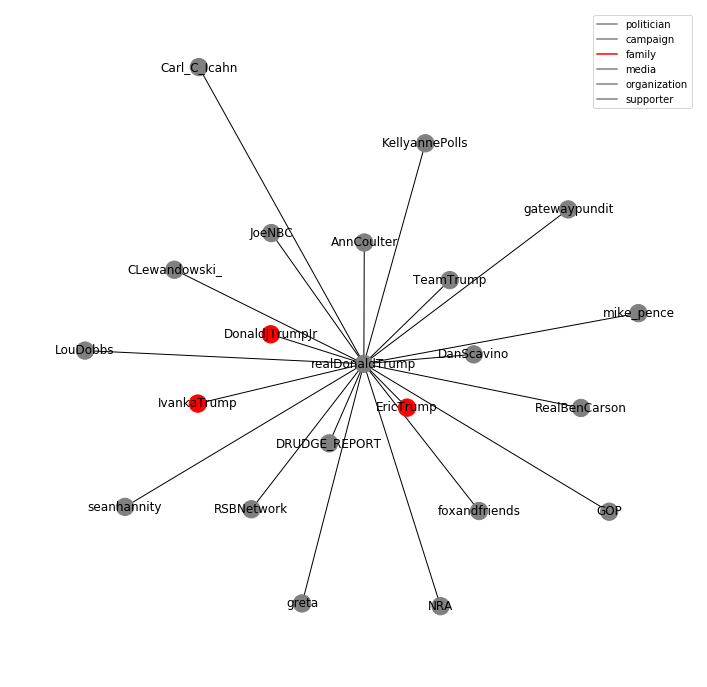

In [83]:
# Draw your network with information about nodes
## read in data frame with node attribute information
n = pandas.read_csv('./trumpnodeinfo.csv') # read in csv store as object d
n.head()

## add node attribute information to graph
for index,row in n.iterrows():
    if row['node'] in G.nodes():
        nodename = row['node']
        nodetype = row['nodetype']
        G.node[nodename]['nodetype'] = nodetype

    
    
## redo drawing, coloring node by attribute
### create a color map
val_to_color = {'campaign':'gray',
                'supporter':'gray',
                'family':'red',
                'organization':'gray',
                'media':'gray',
                'politician':'gray'
}

# loop over nodes, select nodetype for each node (you have to ask it to give you node attributes by using data=True, the attributes are stored as a dictionary in node[1])
# map these nodetype to a number which we will use to assign it a number
node_colors = [val_to_color.get(node[1]['nodetype'], 'magenta') for node in G.nodes(data=True)]

## draw network
### decide on position and create figure
pos = networkx.spring_layout(G,weight="num_retweets",scale=50) 
f = plt.figure(1,figsize=(12,12))


### create legend
ax = f.add_subplot(1,1,1)
for label in val_to_color:
    ax.plot([0],[0],color=val_to_color[label],label=label)

### draw network
networkx.draw(G,pos=pos, with_labels=True,node_size=300,font_size=12,node_color=node_colors) # draw the graph, input the positions you calculated, include labels, set node size and font size

### draw legend
f.set_facecolor('w')
plt.legend()

### save drawing
plt.savefig("Trump_family_network.png") # save as png
plt.show() # display
#plt.savefig('netwk_media.', transparent=True, bbox_inches='tight', pad_inches=0)

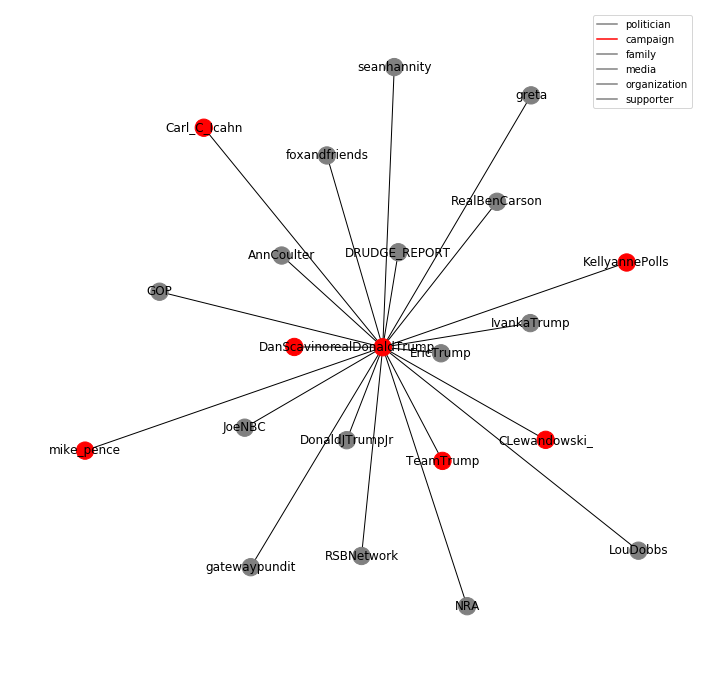

In [82]:
# Draw your network with information about nodes
## read in data frame with node attribute information
n = pandas.read_csv('./trumpnodeinfo.csv') # read in csv store as object d
n.head()

## add node attribute information to graph
for index,row in n.iterrows():
    if row['node'] in G.nodes():
        nodename = row['node']
        nodetype = row['nodetype']
        G.node[nodename]['nodetype'] = nodetype

    
    
## redo drawing, coloring node by attribute
### create a color map
val_to_color = {'campaign':'red',
                'supporter':'gray',
                'family':'gray',
                'organization':'gray',
                'media':'gray',
                'politician':'gray'
}

# loop over nodes, select nodetype for each node (you have to ask it to give you node attributes by using data=True, the attributes are stored as a dictionary in node[1])
# map these nodetype to a number which we will use to assign it a number
node_colors = [val_to_color.get(node[1]['nodetype'], 'magenta') for node in G.nodes(data=True)]

## draw network
### decide on position and create figure
pos = networkx.spring_layout(G,weight="num_retweets",scale=50) 
f = plt.figure(1,figsize=(12,12))


### create legend
ax = f.add_subplot(1,1,1)
for label in val_to_color:
    ax.plot([0],[0],color=val_to_color[label],label=label)

### draw network
networkx.draw(G,pos=pos, with_labels=True,node_size=300,font_size=12,node_color=node_colors) # draw the graph, input the positions you calculated, include labels, set node size and font size

### draw legend
f.set_facecolor('w')
plt.legend()

### save drawing
plt.savefig("Trump_campaign_network.png") # save as png
plt.show() # display